The plan
1. Binary Classification:
- [Basemodel](#scrollTo=Ru-RizLKGFbU&line=1&uniqifier=1)
- [RFC on scaled stances with 3 extra features](#scrollTo=MWmZSwb2GwhW&line=1&uniqifier=1)
- [RFC on scaled stances with 6 extra features](#scrollTo=G_8VoeVA4kv6)
- [RFC on scaled stances with 3 extra features and statics](#scrollTo=XUPH5RyjBXEP)
- [RFC on scaled stances with 6 extra features and statics](#scrollTo=hcySvPsbFqer)
- [RFC model on scaled stances from the right & left foot with 6 extra features each](#scrollTo=aHzN61VULEay&line=1&uniqifier=1)
- [RFC model on scaled stances from the right & left foot with 6 extra features each and basemodels](#scrollTo=FtjB199dOR-m&line=1&uniqifier=1)
- [RFC model on scaled stances from 16 sensor from the right & left foot with 6 extra features each](#scrollTo=GJzuSBzlQ8ES&line=1&uniqifier=1)
- [RFC model on scaled stances from 16 sensor from the right & left foot with the sum of all sensors and with 6 extra features each ](#scrollTo=WunSzzfXco69&line=1&uniqifier=1)
- [RFC model on scaled stances from 16 sensor from the right & left foot and the sum of all sensors and with 6 extra features each foot and the statics from base models](#scrollTo=Pbf7jqHRdG2b&line=1&uniqifier=1)

1. Multiclass Classification - Severity Detection
- [Baselline Model](#scrollTo=RFVESVzhj2qv&line=1&uniqifier=1)
- [RFC model on scaled stances from 16 sensor from the right & left foot with the sum of all sensors and with 6 extra features each](#scrollTo=ihK6ZuxMlqaK&line=1&uniqifier=1)
- [RFC model on scaled stances from 16 sensor from the right & left foot and the sum of all sensors and with 6 extra features each foot and the statics from base models](#scrollTo=hNWcAO2OpvTo&line=1&uniqifier=1)




## Importing libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, auc, roc_curve
from sklearn.preprocessing import StandardScaler

import os

import sys

from tqdm.auto import tqdm

import shutil

from itertools import groupby

import matplotlib.pyplot as plt

from statistics import mean

import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.fftpack import fft
from scipy import signal

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, Input, Flatten, Conv1D, MaxPooling1D, Concatenate, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model


In [ ]:
sys.path.insert(0,"/content/drive/MyDrive/ITMO-Master's/Thesis/3rd_semester")

## Importing my Classes :)

In [ ]:
parquet_path = "/content/drive/MyDrive/ITMO-Master's/Thesis/3rd_semester/Data/parquet_files/"
models_path = "/content/drive/MyDrive/ITMO-Master's/Thesis/3rd_semester/Models/"

In [ ]:
# Data Class
import DataClass 
from DataClass import Data
# Random Forest Classifier Class
import RFClassifier
from RFClassifier import RFClassifier

In [ ]:
# read prepared data
data = Data( 0, "", "",parquet_path)

## RFC (Binary Classification)

### Basemodel

In [ ]:
# the data used 
data.raw_statics_df.shape

(304, 129)

In [ ]:
# splitting the data into train and test data
y = data.raw_statics_df['y']
X = data.raw_statics_df.drop(columns=['ID', 'level', 'y'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=64)

In [ ]:
# Checking which RFC will work the best
rfc = RFClassifier(models_path,200,2)
ccs=rfc.multiple_training([5, 10, 20, 40, 100, 200],2,X_train, np.ravel(y_train), X_test, y_test)

Estimator = 5
Accuracy: 0.8553, Precision: 0.8462, Recall: 0.9821, F1: 0.9091
Estimator = 10
Accuracy: 0.8553, Precision: 0.8571, Recall: 0.9643, F1: 0.9076
Estimator = 20
Accuracy: 0.8289, Precision: 0.8525, Recall: 0.9286, F1: 0.8889
Estimator = 40
Accuracy: 0.8816, Precision: 0.8852, Recall: 0.9643, F1: 0.9231
Estimator = 100
Accuracy: 0.9211, Precision: 0.9167, Recall: 0.9821, F1: 0.9483
Estimator = 200
Accuracy: 0.9079, Precision: 0.9153, Recall: 0.9643, F1: 0.9391


In [ ]:
# recreating the best model to be saved
rfc_100 = RFClassifier(models_path,100,2)
rfc_100.tain(X_train,np.ravel(y_train))
y_pred=rfc_100.predict(X_test)
scores=rfc_100.scores(y_test, y_pred)
# rfc_100.print_scores(scores[0],scores[1],scores[2],scores[3])
# saving the best model
rfc_100.save_model("RFC_raw_statics_100")

### Scaled stances wih fwhm from the sum of forces from the right foot with 3 extra features
 'r_swings_time','r_max_peak','r_total_fwhm'

In [ ]:
# input data and label data
df_1 = data.scaled_stances_statics_df[[ 'r_interp','r_swings_time','r_max_peak','r_total_fwhm']]
y_1 = data.scaled_stances_statics_df[[ 'y']]
# reformatting
df_1 = data.return_array_df(df_1,'r_interp',['r_swings_time','r_max_peak','r_total_fwhm'])
# splitting the data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_1, y_1, random_state=42)

In [ ]:
# Checking which RFC will work the best
rfc_1 = RFClassifier(models_path,200,2)
ccs=rfc_1.multiple_training([5, 10, 20, 40, 100, 200],2, X_train_1, y_train_1, X_test_1,  y_test_1 )

Estimator = 5
Accuracy: 0.9034, Precision: 0.9103, Recall: 0.9515, F1: 0.9304
Estimator = 10
Accuracy: 0.9223, Precision: 0.9313, Recall: 0.9560, F1: 0.9435
Estimator = 20
Accuracy: 0.9313, Precision: 0.9314, Recall: 0.9703, F1: 0.9504
Estimator = 40
Accuracy: 0.9390, Precision: 0.9362, Recall: 0.9767, F1: 0.9560
Estimator = 100
Accuracy: 0.9418, Precision: 0.9370, Recall: 0.9803, F1: 0.9581
Estimator = 200
Accuracy: 0.9414, Precision: 0.9356, Recall: 0.9812, F1: 0.9579


In [ ]:
# recreating the best model to be saved
rfc_1_100 = RFClassifier(models_path,100,2)
rfc_1_100.tain(X_train_1,np.ravel(y_train_1))
y_pred=rfc_1_100.predict(X_test_1)
scores=rfc_1_100.scores(y_test_1, y_pred)
rfc_1_100.print_scores(scores[0],scores[1],scores[2],scores[3])
# saving the best model
rfc_1_100.save_model("RFC_scaled_stances_100")

### Scaled stances wih fwhm from the sum of forces from the right foot with 6 extra features 
'r_swings_time','r_max_peak','r_total_fwhm', 'r_strides_time','r_peaks_toe','r_peaks_heel'

In [ ]:
# input data and label data
df_2 = data.scaled_stances_statics_df[[ 'r_interp','r_swings_time','r_max_peak','r_total_fwhm','r_strides_time','r_peaks_toe','r_peaks_heel']]
y_2 = data.scaled_stances_statics_df[[ 'y']]
# reformatting
df_2 = data.return_array_df(df_2,'r_interp',['r_swings_time','r_max_peak','r_total_fwhm','r_strides_time','r_peaks_toe','r_peaks_heel'])
# splitting the data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_2, y_2, random_state=42)

In [ ]:
# Checking which RFC will work the best
rfc_2 = RFClassifier(models_path,200,2)
ccs=rfc_2.multiple_training([5, 10, 20, 40, 100, 200],2, X_train_2, y_train_2, X_test_2,  y_test_2 )

Estimator = 5
Accuracy: 0.9276, Precision: 0.9308, Recall: 0.9651, F1: 0.9476
Estimator = 10
Accuracy: 0.9394, Precision: 0.9450, Recall: 0.9670, F1: 0.9559
Estimator = 20
Accuracy: 0.9497, Precision: 0.9475, Recall: 0.9803, F1: 0.9636
Estimator = 40
Accuracy: 0.9502, Precision: 0.9456, Recall: 0.9832, F1: 0.9640
Estimator = 100
Accuracy: 0.9537, Precision: 0.9461, Recall: 0.9880, F1: 0.9666
Estimator = 200
Accuracy: 0.9535, Precision: 0.9453, Recall: 0.9887, F1: 0.9665


In [ ]:
# recreating the best model to be saved
rfc_2_100 = RFClassifier(models_path,100,2)
rfc_2_100.tain(X_train_2,y_train_2)
y_pred_2=rfc_2_100.predict(X_test_2)
scores=rfc_2_100.scores(y_test_2, y_pred_2)
# rfc_2_100.print_scores(scores[0],scores[1],scores[2],scores[3])
# saving the best model
rfc_2_100.save_model("RFC_scaled_stances_6_features_100")

### Scaled stances wih fwhm from the sum of forces from the right foot with 3 extra features and statics
 'r_swings_time','r_max_peak','r_total_fwhm' and statics from basemodel


In [ ]:
# input data and label data
colnames_3=['r_interp','r_swings_time','r_max_peak','r_total_fwhm']
for col in ["L1",	"L2",	"L3"	,"L4"	"L5",	"L6",	"L7"	,"L8",	"R1",	"R2"	,"R3",	"R4",	"R5",	"R6",	"R7",	"R8",	"Total_Force_Left",	"Total_Force_Right"]:
    for x in ["Min", "Max", "Std", "Med", "Avg", "Skewness", "Kurtosis"]:
      colnames_3.append( col +'_' +  x)

In [ ]:
df_3 = data.scaled_stances_statics_df[colnames_3]
y_3 = data.scaled_stances_statics_df[[ 'y']]
# reformatting
colnames_3.remove("r_interp")
df_3 = data.return_array_df(df_3,'r_interp',colnames_3)
# splitting the data
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df_3, y_3, random_state=42)

In [ ]:
# Checking which RFC will work the best
rfc_3 = RFClassifier(models_path,200,2)
ccs_3 = rfc_3.multiple_training([5, 10, 20, 40, 100, 200],2, X_train_3, y_train_3,X_test_3, y_test_3)

Estimator = 5
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Estimator = 10
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Estimator = 20
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Estimator = 40
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Estimator = 100
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Estimator = 200
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000


In [ ]:
# recreating the best model to be saved
rfc_3_100 = RFClassifier(models_path,100,2)
rfc_3_100.tain(X_train_3,y_train_3)
y_pred_3=rfc_3_100.predict(X_test_3)
scores=rfc_3_100.scores(y_test_3, y_pred_3)
# rfc_2_100.print_scores(scores[0],scores[1],scores[2],scores[3])
# saving the best model
rfc_3_100.save_model("RFC_scaled_stances_3_features_statics_100")

### Scaled stances wih fwhm from the sum of forces from the right foot with 6 extra features and statics
 'r_swings_time','r_max_peak','r_total_fwhm' and statics from basemodel
 

In [ ]:
# input data and label data
colnames_4=['r_interp','r_swings_time','r_max_peak','r_total_fwhm','r_strides_time','r_peaks_toe','r_peaks_heel']
for col in ["L1",	"L2",	"L3"	,"L4"	"L5",	"L6",	"L7"	,"L8",	"R1",	"R2"	,"R3",	"R4",	"R5",	"R6",	"R7",	"R8",	"Total_Force_Left",	"Total_Force_Right"]:
    for x in ["Min", "Max", "Std", "Med", "Avg", "Skewness", "Kurtosis"]:
      colnames_4.append( col +'_' +  x)

In [ ]:
df_4 = data.scaled_stances_statics_df[colnames_4]
y_4 = data.scaled_stances_statics_df[[ 'y']]
# reformatting
colnames_4.remove("r_interp")
df_4 = data.return_array_df(df_4,'r_interp',colnames_4)
# splitting the data
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(df_4, y_4, random_state=42)

In [ ]:
# Checking which RFC will work the best
rfc_4 = RFClassifier(models_path,200,2)
ccs_4 = rfc_4.multiple_training([5, 10, 20, 40, 100, 200],2, X_train_4, y_train_4,X_test_4, y_test_4)

Estimator = 5
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Estimator = 10
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Estimator = 20
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Estimator = 40
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Estimator = 100
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Estimator = 200
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000


In [ ]:
# recreating the best model to be saved
rfc_4_100 = RFClassifier(models_path,100,2)
rfc_4_100.tain(X_train_4,y_train_4)
y_pred_4=rfc_4_100.predict(X_test_4)
scores=rfc_4_100.scores(y_test_4, y_pred_4)
# rfc_2_100.print_scores(scores[0],scores[1],scores[2],scores[3])
# saving the best model
rfc_4_100.save_model("RFC_scaled_stances_6_features_statics_100")

### Scaled stances wih fwhm from the sum of forces from the right & left foot with 6 extra features each

In [ ]:
# input data and label data
df_5 = data.scaled_stances_statics_df[[ 'r_interp','r_swings_time','r_max_peak','r_total_fwhm','r_strides_time','r_peaks_toe','r_peaks_heel','l_interp','l_swings_time','l_max_peak','l_total_fwhm','l_strides_time','l_peaks_toe','l_peaks_heel']]
y_5 = data.scaled_stances_statics_df[[ 'y']]
# reformatting
df_5 = data.return_array_df_mul_lists(df_5,['r_interp','l_interp'],['r_swings_time','r_max_peak','r_total_fwhm','r_strides_time','r_peaks_toe','r_peaks_heel','l_swings_time','l_max_peak','l_total_fwhm','l_strides_time','l_peaks_toe','l_peaks_heel'])
# splitting the data
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(df_5, y_5, random_state=42)

In [ ]:
# Checking which RFC will work the best
rfc_5 = RFClassifier(models_path,200,2)
ccs_5=rfc_5.multiple_training([5, 10, 20, 40, 100, 200],2, X_train_5, y_train_5, X_test_5,  y_test_5 )

Estimator = 5
Accuracy: 0.9339, Precision: 0.9382, Recall: 0.9664, F1: 0.9521
Estimator = 10
Accuracy: 0.9513, Precision: 0.9559, Recall: 0.9732, F1: 0.9644
Estimator = 20
Accuracy: 0.9587, Precision: 0.9526, Recall: 0.9884, F1: 0.9702
Estimator = 40
Accuracy: 0.9590, Precision: 0.9512, Recall: 0.9903, F1: 0.9704
Estimator = 100
Accuracy: 0.9614, Precision: 0.9522, Recall: 0.9929, F1: 0.9721
Estimator = 200
Accuracy: 0.9607, Precision: 0.9511, Recall: 0.9932, F1: 0.9717


In [ ]:
# recreating the best model to be saved
rfc_5_100 = RFClassifier(models_path,100,2)
rfc_5_100.tain(X_train_5,y_train_5)
y_pred_5=rfc_5_100.predict(X_test_5)
scores_5=rfc_5_100.scores(y_test_5, y_pred_5)
# rfc_2_100.print_scores(scores[0],scores[1],scores[2],scores[3])
# saving the best model
rfc_5_100.save_model("RFC_both_feet_scaled_stances_6_features_100")

### Scaled stances wih fwhm from the sum of forces from the right & left foot with 6 extra features each and statics from base model

In [ ]:
# input data and label data
colnames_6=['r_interp','r_swings_time','r_max_peak','r_total_fwhm','r_strides_time','r_peaks_toe','r_peaks_heel','l_interp','l_swings_time','l_max_peak','l_total_fwhm','l_strides_time','l_peaks_toe','l_peaks_heel']
for col in ["L1",	"L2",	"L3"	,"L4"	"L5",	"L6",	"L7"	,"L8",	"R1",	"R2"	,"R3",	"R4",	"R5",	"R6",	"R7",	"R8",	"Total_Force_Left",	"Total_Force_Right"]:
    for x in ["Min", "Max", "Std", "Med", "Avg", "Skewness", "Kurtosis"]:
      colnames_6.append( col +'_' +  x)

In [ ]:
df_6 = data.scaled_stances_statics_df[colnames_6]
y_6 = data.scaled_stances_statics_df[[ 'y']]
# reformatting
colnames_6.remove("r_interp")
colnames_6.remove("l_interp")
df_6 = data.return_array_df_mul_lists(df_6,['r_interp','l_interp'],colnames_6)
# splitting the data
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(df_6, y_6, random_state=42)

In [ ]:
# Checking which RFC will work the best
rfc_6 = RFClassifier(models_path,200,2)
ccs_6=rfc_6.multiple_training([5, 10, 20, 40, 100, 200],2, X_train_6, y_train_6, X_test_6,  y_test_6 )

Estimator = 5
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Estimator = 10
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Estimator = 20
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Estimator = 40
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Estimator = 100
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Estimator = 200
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000


In [ ]:
# recreating the best model to be saved
rfc_6_100 = RFClassifier(models_path,100,2)
rfc_6_100.tain(X_train_6,y_train_6)
y_pred_6=rfc_6_100.predict(X_test_6)
scores_6=rfc_6_100.scores(y_test_6, y_pred_6)
# rfc_2_100.print_scores(scores[0],scores[1],scores[2],scores[3])
# saving the best model
rfc_6_100.save_model("RFC_both_feet_scaled_stances_6_features_statics_100")

### Scaled stances wih fwhm from the forces of 16 sensor from the right & left foot with 6 extra features each

In [ ]:
colnames_7=['r_swings_time','r_max_peak','r_total_fwhm','r_strides_time','r_peaks_toe','r_peaks_heel','l_swings_time','l_max_peak','l_total_fwhm','l_strides_time','l_peaks_toe','l_peaks_heel']
for col in ["L1",	"L2",	"L3"	,"L4",	"L5",	"L6",	"L7"	,"L8",	"R1",	"R2"	,"R3",	"R4",	"R5",	"R6",	"R7",	"R8"]:
    for x in ["interp", "fwhm"]:
      colnames_7.append( col +'_' +  x)

In [ ]:
col_lists_7=[]
for col in ["L1",	"L2",	"L3"	,"L4"	,"L5",	"L6",	"L7"	,"L8",	"R1",	"R2"	,"R3",	"R4",	"R5",	"R6",	"R7",	"R8"]:
    for x in ["interp"]:
      col_lists_7.append( col +'_' +  x)

In [ ]:
df_7 = data.scaled_stances_statics_df[colnames_7]
y_7 = data.scaled_stances_statics_df[[ 'y']]
# reformatting
for col in col_lists_7:
  colnames_7.remove(col)
df_7 = data.return_array_df_mul_lists(df_7,col_lists_7,colnames_7)
# df_7 = np.asarray([l for l in df_7 if ~np.isnan(l).any()])
df_7[np.isnan(df_7)] = 0
# splitting the data
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(df_7, y_7, random_state=42)

In [ ]:
# Checking which RFC will work the best
rfc_7 = RFClassifier(models_path,200,2)
ccs_7=rfc_7.multiple_training([5, 10, 20, 40, 100, 200],2, X_train_7, y_train_7, X_test_7,  y_test_7 )

Estimator = 5
Accuracy: 0.9511, Precision: 0.9484, Recall: 0.9812, F1: 0.9646
Estimator = 10
Accuracy: 0.9581, Precision: 0.9577, Recall: 0.9816, F1: 0.9695
Estimator = 20
Accuracy: 0.9636, Precision: 0.9549, Recall: 0.9932, F1: 0.9737
Estimator = 40
Accuracy: 0.9629, Precision: 0.9535, Recall: 0.9939, F1: 0.9732
Estimator = 100
Accuracy: 0.9605, Precision: 0.9497, Recall: 0.9945, F1: 0.9716
Estimator = 200
Accuracy: 0.9603, Precision: 0.9486, Recall: 0.9955, F1: 0.9714


In [ ]:
# recreating the best model to be saved
rfc_7_20 = RFClassifier(models_path,20,2)
rfc_7_20.tain(X_train_7,y_train_7)
y_pred_7=rfc_7_20.predict(X_test_7)
scores_7=rfc_7_20.scores(y_test_7, y_pred_7)
# rfc_7_20.print_scores(scores_7[0],scores_7[1],scores_7[2],scores_7[3])
# saving the best model
rfc_7_20.save_model("RFC_both_feet_16_sensors_6_features_20")

### Scaled stances wih fwhm from the forces of 16 sensor from the right & left foot and the sum of all sensors and the with 6 extra features each 

In [ ]:
colnames_9=['r_interp','l_interp','r_swings_time','r_max_peak','r_total_fwhm','r_strides_time','r_peaks_toe','r_peaks_heel','l_swings_time','l_max_peak','l_total_fwhm','l_strides_time','l_peaks_toe','l_peaks_heel']
for col in ["L1",	"L2",	"L3"	,"L4",	"L5",	"L6",	"L7"	,"L8",	"R1",	"R2"	,"R3",	"R4",	"R5",	"R6",	"R7",	"R8"]:
    for x in ["interp", "fwhm"]:
      colnames_9.append( col +'_' +  x)

In [ ]:
col_lists_9=[]
for col in ["l","r","L1",	"L2",	"L3"	,"L4"	,"L5",	"L6",	"L7"	,"L8",	"R1",	"R2"	,"R3",	"R4",	"R5",	"R6",	"R7",	"R8"]:
    for x in ["interp"]:
      col_lists_9.append( col +'_' +  x)

In [ ]:
df_9 = data.scaled_stances_statics_df[colnames_9]
y_9 = data.scaled_stances_statics_df[[ 'y']]
# reformatting
for col in col_lists_9:
  colnames_9.remove(col)
df_9 = data.return_array_df_mul_lists(df_9,col_lists_9,colnames_9)
# df_7 = np.asarray([l for l in df_7 if ~np.isnan(l).any()])
df_9[np.isnan(df_9)] = 0
# splitting the data
X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(df_9, y_9, random_state=42)

In [ ]:
# Checking which RFC will work the best
rfc_9 = RFClassifier(models_path,200,2)
ccs_9=rfc_9.multiple_training([5, 10, 20, 40, 100, 200],2, X_train_9, y_train_9, X_test_9,  y_test_9 )

Estimator = 5
Accuracy: 0.9434, Precision: 0.9423, Recall: 0.9764, F1: 0.9590
Estimator = 10
Accuracy: 0.9596, Precision: 0.9593, Recall: 0.9822, F1: 0.9706
Estimator = 20
Accuracy: 0.9631, Precision: 0.9529, Recall: 0.9948, F1: 0.9734
Estimator = 40
Accuracy: 0.9636, Precision: 0.9530, Recall: 0.9955, F1: 0.9738
Estimator = 100
Accuracy: 0.9645, Precision: 0.9533, Recall: 0.9964, F1: 0.9744
Estimator = 200
Accuracy: 0.9642, Precision: 0.9524, Recall: 0.9971, F1: 0.9743


In [ ]:
# recreating the best model to be saved
rfc_9_100 = RFClassifier(models_path,100,2)
rfc_9_100.tain(X_train_9,y_train_9)
y_pred_9=rfc_9_100.predict(X_test_9)
scores_9=rfc_9_100.scores(y_test_9, y_pred_9)
# rfc_7_20.print_scores(scores_7[0],scores_7[1],scores_7[2],scores_7[3])
# saving the best model
rfc_9_100.save_model("RFC_both_feet_16_sensors_sumsensors_6_features_100")

### Scaled stances wih fwhm from the forces of 16 sensor from the right & left foot and the sum of all sensors and the with 6 extra features each and the statics from base models

In [ ]:
colnames_8=['r_interp','r_swings_time','r_max_peak','r_total_fwhm','r_strides_time','r_peaks_toe','r_peaks_heel','l_interp','l_swings_time','l_max_peak','l_total_fwhm','l_strides_time','l_peaks_toe','l_peaks_heel']
for col in ["L1",	"L2",	"L3"	,"L4",	"L5",	"L6",	"L7"	,"L8",	"R1",	"R2"	,"R3",	"R4",	"R5",	"R6",	"R7",	"R8"]:
    for x in ["interp", "fwhm"]:
      colnames_8.append( col +'_' +  x)

for col in ["L1",	"L2",	"L3"	,"L4"	"L5",	"L6",	"L7"	,"L8",	"R1",	"R2"	,"R3",	"R4",	"R5",	"R6",	"R7",	"R8",	"Total_Force_Left",	"Total_Force_Right"]:
    for x in ["Min", "Max", "Std", "Med", "Avg", "Skewness", "Kurtosis"]:
      colnames_8.append( col +'_' +  x)

col_lists_8=['r_interp','l_interp']
for col in ["L1",	"L2",	"L3"	,"L4"	,"L5",	"L6",	"L7"	,"L8",	"R1",	"R2"	,"R3",	"R4",	"R5",	"R6",	"R7",	"R8"]:
    for x in ["interp"]:
      col_lists_8.append( col +'_' +  x)

df_8 = data.scaled_stances_statics_df[colnames_8]
y_8 = data.scaled_stances_statics_df[[ 'y']]
# reformatting
for col in col_lists_8:
  colnames_8.remove(col)
df_8 = data.return_array_df_mul_lists(df_8,col_lists_8,colnames_8)
# df_7 = np.asarray([l for l in df_7 if ~np.isnan(l).any()])
df_8[np.isnan(df_8)] = 0
# splitting the data
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(df_8, y_8, random_state=42)


In [ ]:
# Checking which RFC will work the best
rfc_8 = RFClassifier(models_path,200,2)
ccs_8=rfc_8.multiple_training([5, 10, 20, 40, 100, 200],2, X_train_8, y_train_8, X_test_8,  y_test_8 )

Estimator = 5
Accuracy: 0.9974, Precision: 0.9974, Recall: 0.9987, F1: 0.9981
Estimator = 10
Accuracy: 0.9996, Precision: 1.0000, Recall: 0.9994, F1: 0.9997
Estimator = 20
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Estimator = 40
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Estimator = 100
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Estimator = 200
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000


In [ ]:
# recreating the best model to be saved
rfc_8_100 = RFClassifier(models_path,100,2)
rfc_8_100.tain(X_train_8,y_train_8)
y_pred_8=rfc_8_100.predict(X_test_8)
scores_8=rfc_8_100.scores(y_test_8, y_pred_8)
# rfc_7_20.print_scores(scores_7[0],scores_7[1],scores_7[2],scores_7[3])
# saving the best model
rfc_8_100.save_model("RFC_both_feet_16_sensors_sumsensors_6_features_100") 

## RFC (Multiclass Classification)

### Baseline model

In [ ]:
min_cols=[]
for col in data.cols_names[1:]:
  colname = col +'_Min'
  min_cols.append(colname)

In [ ]:
min_cols= np.append( min_cols, ['ID','y','level'])

In [ ]:
# splitting the data into train and test data
y = data.raw_statics_df['level']
X = data.raw_statics_df.drop(columns=min_cols, axis=1)

In [ ]:
y.replace(3, 4, inplace= True) 
y.replace(2.5, 3, inplace= True)  
y_m=y.astype('int')

# splitting the data
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X, y_m, random_state=42)

In [ ]:
# Checking which RFC will work the best
rfc_m = RFClassifier(models_path,200,2,'micro')
ccs_m=rfc_m.multiple_training([5, 10, 20, 40, 100, 200],2, X_train_m, y_train_m, X_test_m,  y_test_m )

Estimator = 5
Accuracy: 0.6447, Precision: 0.6447, Recall: 0.6447, F1: 0.6447
Estimator = 10
Accuracy: 0.6974, Precision: 0.6974, Recall: 0.6974, F1: 0.6974
Estimator = 20
Accuracy: 0.7763, Precision: 0.7763, Recall: 0.7763, F1: 0.7763
Estimator = 40
Accuracy: 0.7763, Precision: 0.7763, Recall: 0.7763, F1: 0.7763
Estimator = 100
Accuracy: 0.7763, Precision: 0.7763, Recall: 0.7763, F1: 0.7763
Estimator = 200
Accuracy: 0.7500, Precision: 0.7500, Recall: 0.7500, F1: 0.7500


### 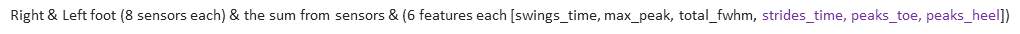

In [ ]:
colnames_9=['r_interp','l_interp','r_swings_time','r_max_peak','r_total_fwhm','r_strides_time','r_peaks_toe','r_peaks_heel','l_swings_time','l_max_peak','l_total_fwhm','l_strides_time','l_peaks_toe','l_peaks_heel']
for col in ["L1",	"L2",	"L3"	,"L4",	"L5",	"L6",	"L7"	,"L8",	"R1",	"R2"	,"R3",	"R4",	"R5",	"R6",	"R7",	"R8"]:
    for x in ["interp", "fwhm"]:
      colnames_9.append( col +'_' +  x)

In [ ]:
col_lists_9=[]
for col in ["l","r","L1",	"L2",	"L3"	,"L4"	,"L5",	"L6",	"L7"	,"L8",	"R1",	"R2"	,"R3",	"R4",	"R5",	"R6",	"R7",	"R8"]:
    for x in ["interp"]:
      col_lists_9.append( col +'_' +  x)

In [ ]:
df_9 = data.scaled_stances_statics_df[colnames_9]
y_9 = data.scaled_stances_statics_df[[ 'level']]
y_9.replace(3, 4, inplace= True) 
y_9.replace(2.5, 3, inplace= True)  
y_m=y_9.astype('int')

# reformatting
for col in col_lists_9:
  colnames_9.remove(col)
df_9 = data.return_array_df_mul_lists(df_9,col_lists_9,colnames_9)
# df_7 = np.asarray([l for l in df_7 if ~np.isnan(l).any()])
df_9[np.isnan(df_9)] = 0
# splitting the data
X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(df_9, y_m, random_state=42)

<ipython-input-17-16ba76439454>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_9.replace(3, 4, inplace= True)
<ipython-input-17-16ba76439454>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_9.replace(2.5, 3, inplace= True)


In [ ]:
# Checking which RFC will work the best
rfc_m = RFClassifier(models_path,200,2,'micro')
ccs_m=rfc_m.multiple_training([5, 10, 20, 40, 100, 200],2, X_train_9, y_train_9, X_test_9,  y_test_9)

Estimator = 5
Accuracy: 0.8811, Precision: 0.8811, Recall: 0.8811, F1: 0.8811
Estimator = 10
Accuracy: 0.9085, Precision: 0.9085, Recall: 0.9085, F1: 0.9085
Estimator = 20
Accuracy: 0.9219, Precision: 0.9219, Recall: 0.9219, F1: 0.9219
Estimator = 40
Accuracy: 0.9344, Precision: 0.9344, Recall: 0.9344, F1: 0.9344
Estimator = 100
Accuracy: 0.9399, Precision: 0.9399, Recall: 0.9399, F1: 0.9399
Estimator = 200
Accuracy: 0.9397, Precision: 0.9397, Recall: 0.9397, F1: 0.9397


### 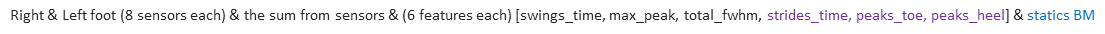

In [ ]:
colnames_8=['r_interp','r_swings_time','r_max_peak','r_total_fwhm','r_strides_time','r_peaks_toe','r_peaks_heel','l_interp','l_swings_time','l_max_peak','l_total_fwhm','l_strides_time','l_peaks_toe','l_peaks_heel']
for col in ["L1",	"L2",	"L3"	,"L4",	"L5",	"L6",	"L7"	,"L8",	"R1",	"R2"	,"R3",	"R4",	"R5",	"R6",	"R7",	"R8"]:
    for x in ["interp", "fwhm"]:
      colnames_8.append( col +'_' +  x)

for col in ["L1",	"L2",	"L3"	,"L4"	,"L5",	"L6",	"L7"	,"L8",	"R1",	"R2"	,"R3",	"R4",	"R5",	"R6",	"R7",	"R8",	"Total_Force_Left",	"Total_Force_Right"]:
    for x in ["Min", "Max", "Std", "Med", "Avg", "Skewness"]:
      colnames_8.append( col +'_' +  x)

for col in ["L1",	"L2",	"L3"	,	"L6",	"L7"	,"L8",	"R1",	"R2"	,"R3",	"R4",	"R5",	"R6",	"R7",	"R8",	"Total_Force_Left",	"Total_Force_Right"]:
      colnames_8.append( col +'_' +  "Kurtosis")
for col in ["L4"	,"L5"]:
  colnames_8.append( col +'_' +  "kurtosis")
  
col_lists_8=['r_interp','l_interp']
for col in ["L1",	"L2",	"L3"	,"L4"	,"L5",	"L6",	"L7"	,"L8",	"R1",	"R2"	,"R3",	"R4",	"R5",	"R6",	"R7",	"R8"]:
    for x in ["interp"]:
      col_lists_8.append( col +'_' +  x)

df_8 = data.scaled_stances_statics_df[colnames_8]
y_8 = data.scaled_stances_statics_df[[ 'level']]
y_8.replace(3, 4, inplace= True) 
y_8.replace(2.5, 3, inplace= True)  
y_m=y_8.astype('int')
# reformatting
for col in col_lists_8:
  colnames_8.remove(col)
df_8 = data.return_array_df_mul_lists(df_8,col_lists_8,colnames_8)
# df_7 = np.asarray([l for l in df_7 if ~np.isnan(l).any()])
df_8[np.isnan(df_8)] = 0
# splitting the data
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(df_8, y_m, random_state=42)


<ipython-input-23-4de871fe1818>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_8.replace(3, 4, inplace= True)
<ipython-input-23-4de871fe1818>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_8.replace(2.5, 3, inplace= True)


In [ ]:
# Checking which RFC will work the best
rfc_m = RFClassifier(models_path,200,2,'micro')
ccs_m=rfc_m.multiple_training([5, 10, 20, 40, 100, 200],2, X_train_8, y_train_8, X_test_8,  y_test_8)

Estimator = 5
Accuracy: 0.9991, Precision: 0.9991, Recall: 0.9991, F1: 0.9991
Estimator = 10
Accuracy: 0.9998, Precision: 0.9998, Recall: 0.9998, F1: 0.9998
Estimator = 20
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Estimator = 40
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Estimator = 100
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Estimator = 200
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
